# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
data = pd.read_csv("real_estate_data.csv", sep ='\t')
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108  2019-03-07T00:00:00      3   
1             7     3350000          40  2018-12-04T00:00:00      1   
2            10     5196000          56  2015-08-20T00:00:00      2   
3             0    64900000         159  2015-07-24T00:00:00      3   
4             2    10000000         100  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0               2            16           51      8          NaN  ...   
1             NaN            11           18      1          NaN  ...   
2             NaN             5           34      4          NaN  ...   
3             NaN            14          NaN      9          NaN  ...   
4               3            14           32     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0            25      NaN  Санкт-Петербург             18863   
1       

### Предобработка данных

In [326]:
data = data.rename(columns={'floor': 'floor_number'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor_number          23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [327]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor_number                0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Процент пропусков в каждом столбце:

In [328]:
good_data = data
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,NaN,...,25,NaN,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40,2018-12-04T00:00:00,1,NaN,11,18,1,NaN,...,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20T00:00:00,2,NaN,5,34,4,NaN,...,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,NaN,...,41,NaN,Санкт-Петербург,31856,8098,2,112,1,48,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21T00:00:00,3,3,5,73,3,NaN,...,13,NaN,Санкт-Петербург,24665,4232,1,796,3,381,NaN
23695,14,3100000,59,2018-01-15T00:00:00,3,NaN,5,38,4,NaN,...,8,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45
23696,18,2500000,56,2018-02-11T00:00:00,2,NaN,3,29,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000,76,2017-03-28T00:00:00,2,3,17,NaN,12,NaN,...,23,2,Санкт-Петербург,39140,10364,2,173,3,196,602


In [329]:
percent_missing = good_data.isnull().sum() * 100 / len(good_data)
missing_value_good_data = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_good_data)

                      percent_missing
total_images                        0
last_price                          0
total_area                          0
first_day_exposition                0
rooms                               0
ceiling_height                     38
floors_total                        0
living_area                         8
floor_number                        0
is_apartment                       88
studio                              0
open_plan                           0
kitchen_area                        9
balcony                            48
locality_name                       0
airports_nearest                   23
cityCenters_nearest                23
parks_around3000                   23
parks_nearest                      65
ponds_around3000                   23
ponds_nearest                      61
days_exposition                    13


О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Пропуски: 
- 1: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony
- 2: locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition

Пропуски второго типа(картографические) я не смогу восстановить. Посмотрим на распределения значений в каждом стобце.

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor_number'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

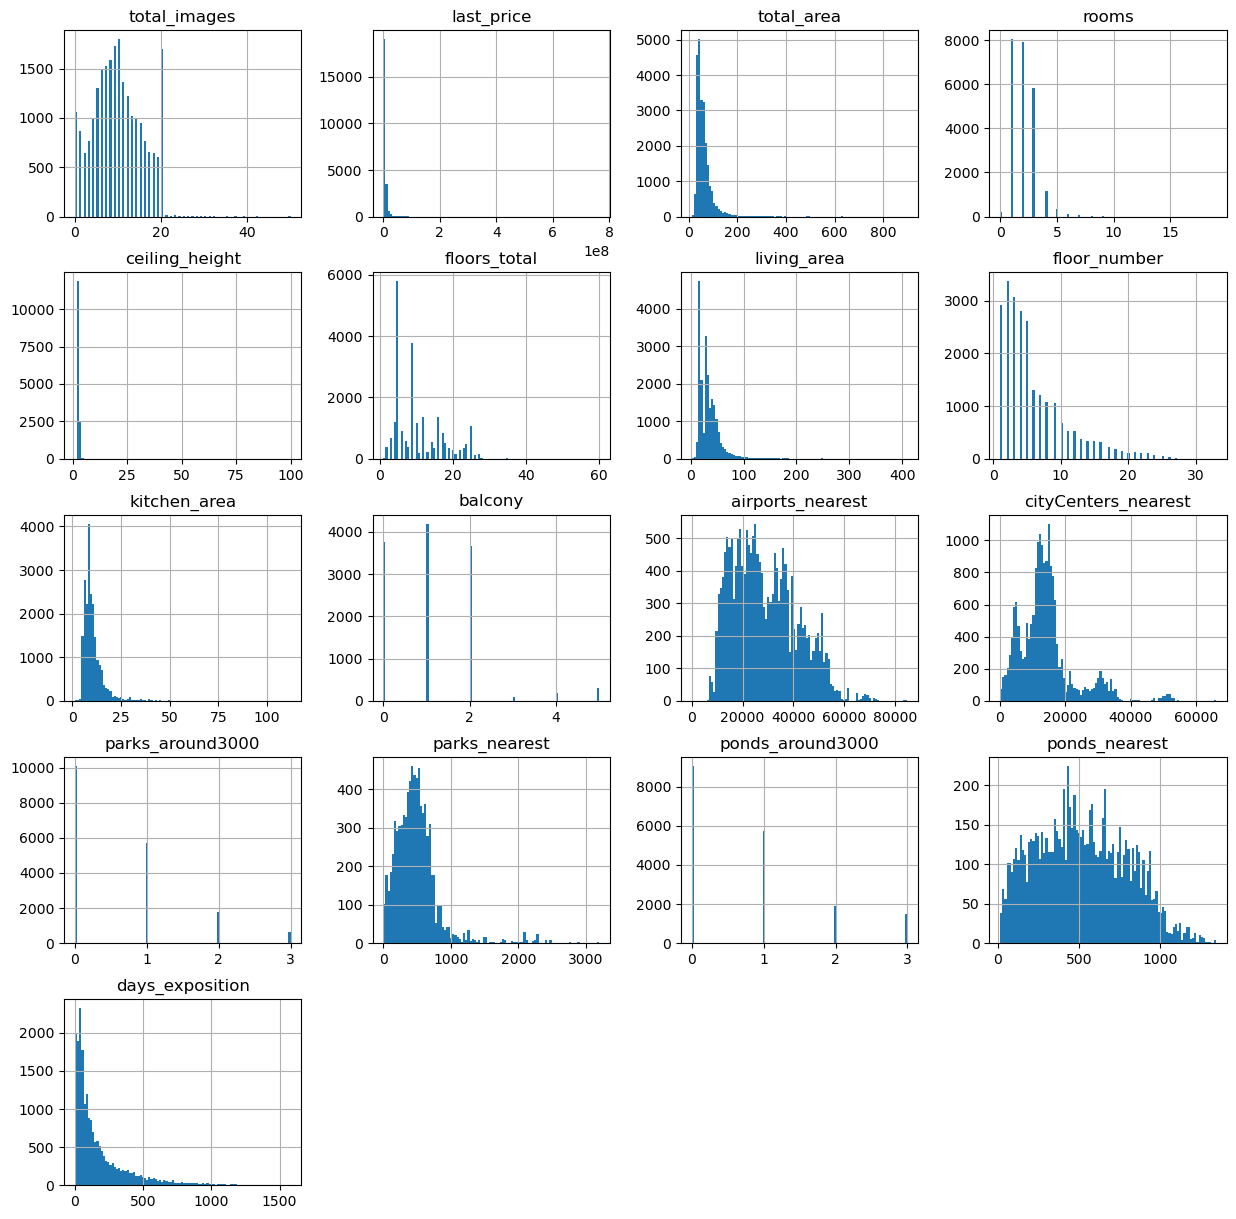

In [330]:
data.hist(figsize=(15,15),  bins = 100)

In [331]:
data.corr()

C:\Users\Владислав\AppData\Local\Temp\ipykernel_4912\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor_number,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
last_price,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
total_area,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rooms,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ceiling_height,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
floors_total,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
living_area,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
floor_number,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
studio,0,0,0,0,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0
open_plan,0,0,0,0,0,0,0,0,0,1,NaN,0,0,0,0,0,0,0,0


In [332]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor_number,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


Обработка значений и пропусков в столбце ceiling_height:

<Axes: >

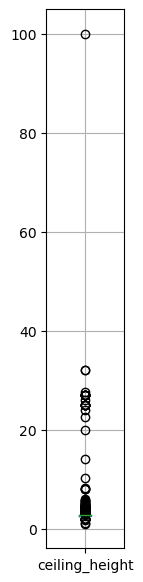

In [333]:
data.boxplot('ceiling_height', figsize = (1,7))

Есть аномальные значения, где высота потолков больше 20. Вероятно, пропустили запятую. Так же есть значение 100, это выброс - его нужно отбросить.

<Axes: >

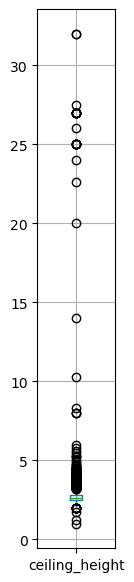

In [334]:
good_data = good_data.query("ceiling_height < 40 | ceiling_height.isna()").reset_index(drop=True)
good_data.boxplot('ceiling_height', figsize = (1,7))

In [335]:
good_data['ceiling_height'].isna().sum()

9195

Функция для замены значений больше 20:

In [336]:
def fix_ceiling_height(ceiling_height):
    if 20 <= ceiling_height <= 40:
        return ceiling_height/10
    return ceiling_height

<Axes: >

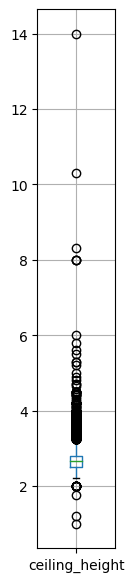

In [337]:
good_data['ceiling_height'] = good_data['ceiling_height'].apply(fix_ceiling_height).reset_index(drop=True)
good_data.boxplot('ceiling_height', figsize = (1,7))

Высота потолков от 2м до 6м являются необычными и редкими, их можно отбросить.

In [338]:
good_data = good_data.query("2 <= ceiling_height <= 6 | ceiling_height.isna()")

Теперь оставшиеся значения можно заполнить медианным значением.

In [339]:
good_data['ceiling_height'] = good_data['ceiling_height'].fillna(good_data['ceiling_height'].median())

In [340]:
good_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor_number                0
is_apartment            20916
studio                      0
open_plan                   0
kitchen_area             2276
balcony                 11513
locality_name              49
airports_nearest         5540
cityCenters_nearest      5517
parks_around3000         5516
parks_nearest           15614
ponds_around3000         5516
ponds_nearest           14584
days_exposition          3181
dtype: int64

Обработка значений и пропусков в столбце floors_total и floor:

<Axes: >

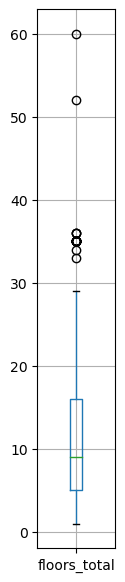

In [341]:
good_data.boxplot('floors_total', figsize = (1,7))

In [342]:
good_data['floors_total'].describe()

count   23603
mean       10
std         6
min         1
25%         5
50%         9
75%        16
max        60
Name: floors_total, dtype: float64

Из диаграммы размаха видно, что значения больше 40 являются редкими, их можно отбросить.

In [343]:
good_data = good_data.query('floors_total < 40')

<Axes: >

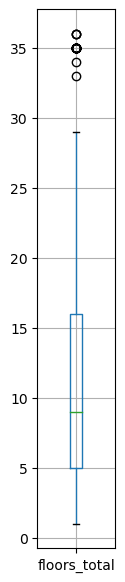

In [344]:
good_data.boxplot('floors_total', figsize = (1,7))

Есть ли значения floors_total < floor:

In [345]:
len(good_data[good_data['floors_total'] < good_data['floor_number']])

0

<Axes: >

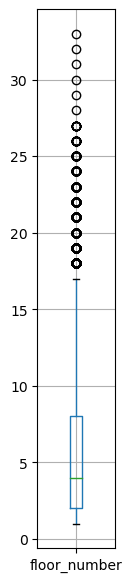

In [346]:
good_data.boxplot('floor_number', figsize = (1,7))

Из диаграммы видно, что значения больше 27 являются редкими, их можно исключить:

In [347]:
good_data = good_data.query('floor_number < = 27')

<Axes: >

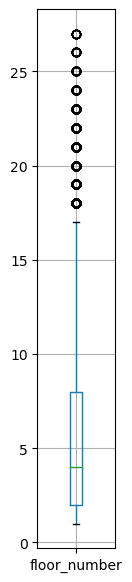

In [348]:
good_data.boxplot('floor_number', figsize = (1,7))

In [349]:
good_data['floor_number'].value_counts()

2     3364
3     3069
1     2912
4     2793
5     2614
6     1296
7     1213
8     1075
9     1046
10     684
12     520
11     520
13     376
15     339
14     334
16     315
17     226
18     174
19     144
21     121
22     112
20     108
23      99
24      61
25      46
26      24
27      10
Name: floor_number, dtype: int64

Обработка пропущенных значений в living_area:

In [350]:
good_data['living_area'].describe()

count   21725
mean       34
std        22
min         2
25%        18
50%        30
75%        42
max       409
Name: living_area, dtype: float64

<Axes: >

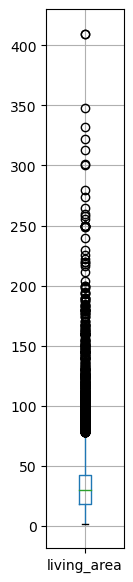

In [351]:
good_data.boxplot('living_area', figsize = (1,7))

Значения больше 200 являются редкими, их можно отбросить:

In [352]:
good_data = good_data.query('living_area <= 200')

<Axes: >

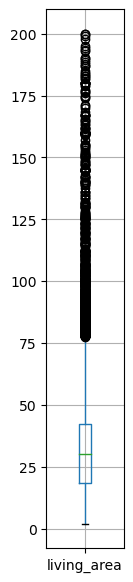

In [353]:
good_data.boxplot('living_area', figsize = (1,7))

Есть ли значения living_area, большие total_area?

In [354]:
len(good_data[good_data['living_area'] > good_data['total_area']])

0

Заменим пропуски в столбце living_area, произведениями известных величин общей площади на коэффициенты долей жилой площади в общей в зависимости от количества комнат:

In [355]:
good_data['living_area'] = good_data['living_area'].fillna(good_data['total_area'] *
                                                 (good_data.groupby('rooms')['living_area'].transform('median') /
                                                 good_data.groupby('rooms')['total_area'].transform('median')))

In [356]:
good_data['living_area'].isna().sum()

0

Анализ данных is_apartment и balcony:

In [357]:
good_data['is_apartment'].value_counts(dropna=False)

NaN      19044
False     2610
True        40
Name: is_apartment, dtype: int64

Пропуски скорее всего связаны с тем, что в данных не указали апартмаенты это или нет по причине, что это не апартаменты.

In [358]:
good_data['is_apartment'] = good_data['is_apartment'].fillna(False)

In [359]:
good_data['is_apartment'].value_counts(dropna=False)

False    21654
True        40
Name: is_apartment, dtype: int64

Анализ данных is_apartment и balcony:

In [360]:
good_data['balcony'].value_counts(dropna=False)

NaN    10063
1       4051
0       3545
2       3504
5        281
4        176
3         74
Name: balcony, dtype: int64

Пропуски скорее всего связаны с тем, что данные об отсутствии балконов не заполнялись или были заполнены неправильно.

In [361]:
good_data['balcony'] = good_data['balcony'].fillna(0)

In [362]:
good_data['balcony'].value_counts(dropna=False)

0    13608
1     4051
2     3504
5      281
4      176
3       74
Name: balcony, dtype: int64

Заполним пропуски в столбце kitchen_area:

In [363]:
((good_data['kitchen_area'] + good_data['living_area'])/good_data['total_area']).median()


0.75

Медианное отношение жилой площади и кухни к общей площади равно 0.75, по этому значению заполним пропуски в kitchen_area

In [364]:
good_data['kitchen_area'].fillna(good_data['total_area'] * 0.75 - good_data['living_area'])

0       25
1       11
2        8
4       41
5        9
        ..
23692    8
23693   13
23694    8
23695   12
23697    9
Name: kitchen_area, Length: 21694, dtype: float64

In [365]:
len(good_data[good_data['kitchen_area'] < 0])

0

In [366]:
len(good_data[good_data['total_area'] - good_data['living_area'] - good_data['kitchen_area'] < 0])

67

In [367]:
good_data = good_data.query('kitchen_area > 0')
len(good_data[good_data['kitchen_area'] < 0])

0

Пропуски в столбце locality_name и floors_total составляют малую часть данных, и их можно отбросить:

In [368]:
good_data = good_data.dropna(subset = ['locality_name', 'floors_total'])

In [369]:
good_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor_number                0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4660
cityCenters_nearest      4641
parks_around3000         4640
parks_nearest           13644
ponds_around3000         4640
ponds_nearest           12831
days_exposition          2879
dtype: int64

Изменим типы данных там, где это нужно.

In [370]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20860 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20860 non-null  int64  
 1   last_price            20860 non-null  float64
 2   total_area            20860 non-null  float64
 3   first_day_exposition  20860 non-null  object 
 4   rooms                 20860 non-null  int64  
 5   ceiling_height        20860 non-null  float64
 6   floors_total          20860 non-null  float64
 7   living_area           20860 non-null  float64
 8   floor_number          20860 non-null  int64  
 9   is_apartment          20860 non-null  bool   
 10  studio                20860 non-null  bool   
 11  open_plan             20860 non-null  bool   
 12  kitchen_area          20860 non-null  float64
 13  balcony               20860 non-null  float64
 14  locality_name         20860 non-null  object 
 15  airports_nearest   

In [371]:
good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_number,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2,16,51,8,False,...,25,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40,2018-12-04T00:00:00,1,2,11,18,1,False,...,11,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56,2015-08-20T00:00:00,2,2,5,34,4,False,...,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
4,2,10000000,100,2018-06-19T00:00:00,2,3,14,32,13,False,...,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30,2018-09-10T00:00:00,1,2,12,14,5,False,...,9,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55


Заменим типы данных на integer в стобцах last_price, floors_total, balcony, т. к. там встречаются только целые значения. Можно еще поменять в parks_nearest, ponds_around3000, ponds_nearest, days_exposition, но там большое количество пропусков из-за которых нельзя поменять тип данных, удалить их тоже нельзя.	

In [372]:
good_data['first_day_exposition'] = pd.to_datetime(good_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

In [373]:
good_data.astype({'last_price': 'int64',
                  'floors_total': 'int64',
                  'balcony':'int64'}).dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor_number                     int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Анализ стоблца locality_name:

In [374]:
good_data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Советский', 'городской посёлок Фёдоро

In [375]:
good_data['locality_name'] = good_data['locality_name'].astype(str)

Есть заметные неисправности: поселок/посёлок.

In [376]:
good_data['locality_name'] = good_data['locality_name'].str.replace('ё', 'е')

In [377]:
good_data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Советский',
       'городской поселок Федоровское', 'городской поселок Ян

Вновь проверим данные на наличие явных дубликатов:

In [378]:
good_data.duplicated().sum()

0

Проанализируем столбец last_price на наличие выбросов:

In [379]:
pd.set_option('display.float_format', lambda x: '%i'%x)
good_data['last_price'].describe()

count       20860
mean      6363326
std       7943291
min         12190
25%       3500000
50%       4700000
75%       6800000
max     330000000
Name: last_price, dtype: float64

<Axes: >

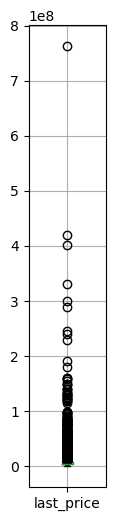

In [380]:
data.boxplot(column='last_price', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 100 млн являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [381]:
good_data = good_data.query('last_price <= 100000000').reset_index(drop=True)

Проанализируем столбец total_area на наличие выбросов:

In [382]:
good_data['total_area'].describe()

count   20839
mean       59
std        30
min        14
25%        40
50%        52
75%        69
max       413
Name: total_area, dtype: float64

<Axes: >

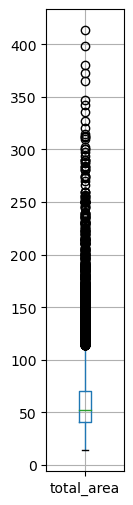

In [383]:
good_data.boxplot(column='total_area', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 400 кв.м. являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [384]:
good_data = good_data.query('total_area <= 400').reset_index(drop=True)

Проанализируем столбец rooms на наличие выбросов:

In [385]:
good_data['rooms'].describe()

count   20838
mean        2
std         1
min         1
25%         1
50%         2
75%         3
max        16
Name: rooms, dtype: float64

<Axes: >

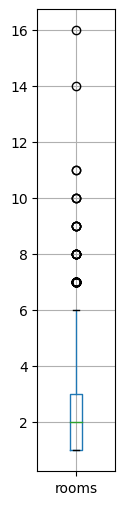

In [386]:
good_data.boxplot(column='rooms', grid=True, figsize=(1, 6))

Из диаграммы видно, что значения более 10 являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [387]:
good_data = good_data.query('rooms <= 10').reset_index(drop=True)

Остальные столбцы либо не несут важной смысловой нагрузки для последующего анализа, либо распределение их значений по первичным диаграммам близко к нормальному - поэтому анализ этих столбцов на аномалии не требуется.

### Посчитайте и добавьте в таблицу новые столбцы

In [388]:
good_data['price_per_meter'] = good_data['last_price']/ good_data['total_area']

In [389]:
good_data['exposition_weekday'] = good_data['first_day_exposition'].dt.weekday

In [390]:
good_data['exposition_month'] = good_data['first_day_exposition'].dt.month

In [391]:
good_data['exposition_year'] = good_data['first_day_exposition'].dt.year

In [392]:
def floor_type(row):
    if row['floor_number'] == 1:
        return 'первый'
    if row['floor_number'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [393]:
good_data['floor_type'] = good_data.apply(floor_type, axis = 1)

In [394]:
good_data['km_to_city_center'] = round(good_data.cityCenters_nearest / 1000)

### Проведите исследовательский анализ данных

Изучим параметры объектов недвижимости:

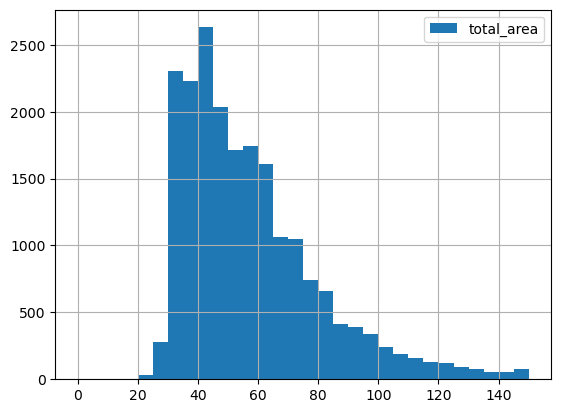

In [395]:
good_data['total_area'].hist(bins=30, range=(0,150),legend='total_area')
plt.show()

В наборе данных преобладают объекты общей площадью 40-45 кв.м.

Данные по жилой площади:

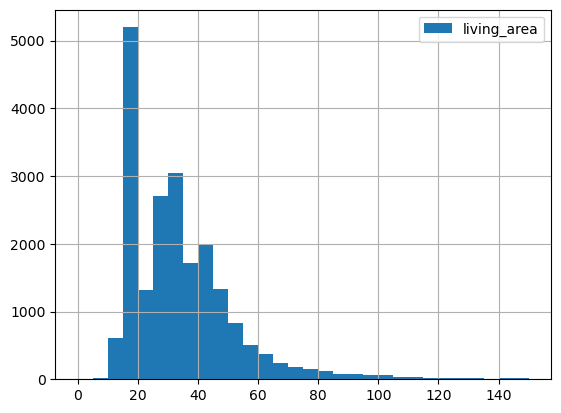

In [396]:
good_data['living_area'].hist(bins=30, range=(0,150),legend='living_area')
plt.show()

Среди продаваемых объектов недвижимости больше всего объектов с жилой площадью 15-20 кв.м., но есть и объекты с жилой площадью менее 10 кв.м.

Данные по площади кухни:

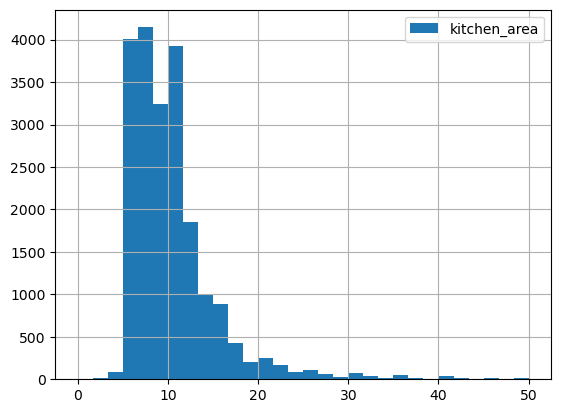

In [397]:
good_data['kitchen_area'].hist(bins=30, range=(0,50),legend='kitchen_area')
plt.show()

Наиболее часто встречаемая площадь кухонь 5-12 кв. м. (чаще всего около 8), при этом присутствуют кухни с площадью менее 5 кв.м и более 40.

Данные по цене объекта:

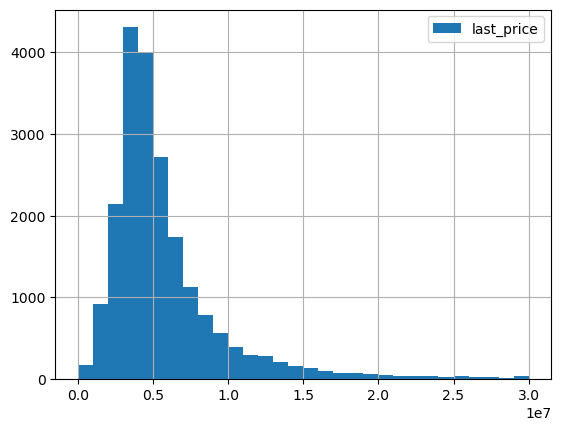

In [398]:
good_data['last_price'].hist(bins=30, range=(0,3e7), legend='last_price')
plt.show()

Наиболее частая цена объекта 3,5-5 млн.руб.

Данные по количеству комнат:

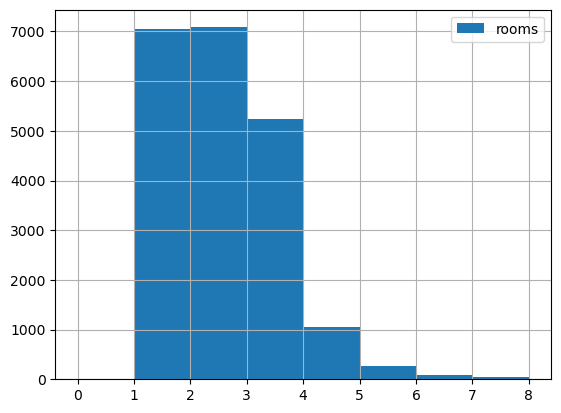

In [399]:
good_data['rooms'].hist(bins=8, range=(0,8),legend='rooms')
plt.show()

Больше всего проедается квартир с количеством комнат 1 и 2, что логично и в целом соответствует рынку недвижимости.



Данные по высоте потолков:

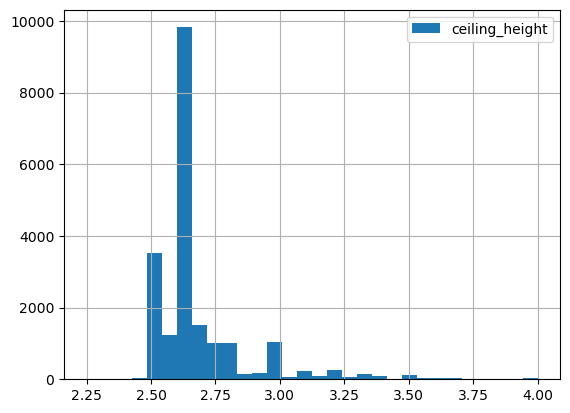

In [400]:
good_data['ceiling_height'].hist(bins=30, range=(2.25,4),legend='ceiling_height')
plt.show()

Наиболее часто встречающиеся высоты потолков 2,5 и 2,6 м что соответствуем двум самым популярным классам объектом недвижимости.

Данные по этажу квартиры:

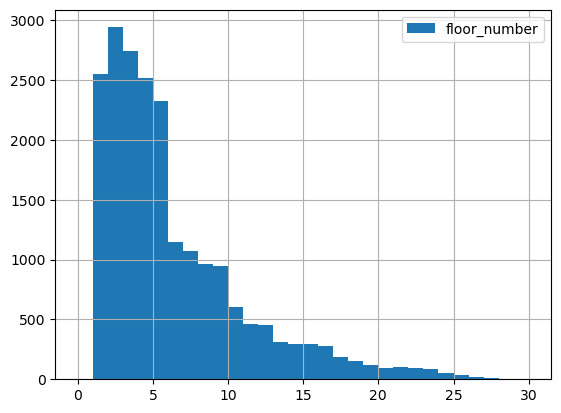

In [401]:
good_data['floor_number'].hist(bins=30, range=(0,30),legend='floor_number')
plt.show()

Судя по гистограмме, чаще всего продавались объекты высотой до 6 этажа.



Данные по типу этажа квартиры:


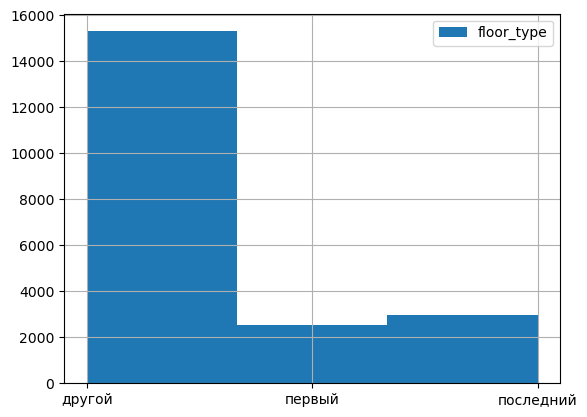

In [402]:
good_data['floor_type'].hist(bins=3,legend='floor_type')
plt.show()

Большая часть продаваемых квартир расположена ни на первых ни на последних этажах, первые и последние этаже продаются реже.

Данные по общему количеству этажей в доме:

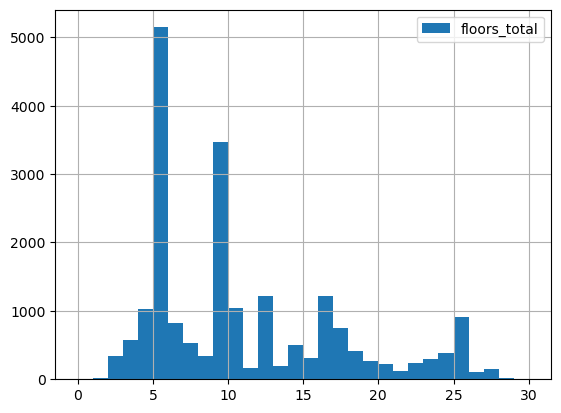

In [403]:
good_data['floors_total'].hist(bins=30,range=(0,30),legend='floors_total')
plt.show()

Наибольшее число квартир продавалось в 5-этажных домах и 9-этажных.



Данные по расстоянию до центра города в метрах:

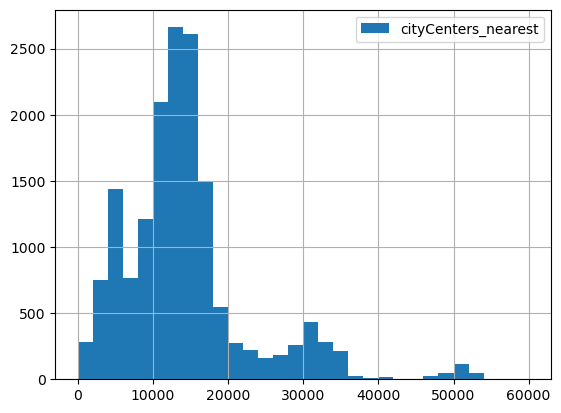

In [404]:
good_data['cityCenters_nearest'].hist(bins=30, range=(0,60000), legend='cityCenters_nearest')
plt.show()

Чаще всего продавались объекты, удаленные от центра на 12-16 км.

Данные по расстоянию до ближайшего аэропорта:


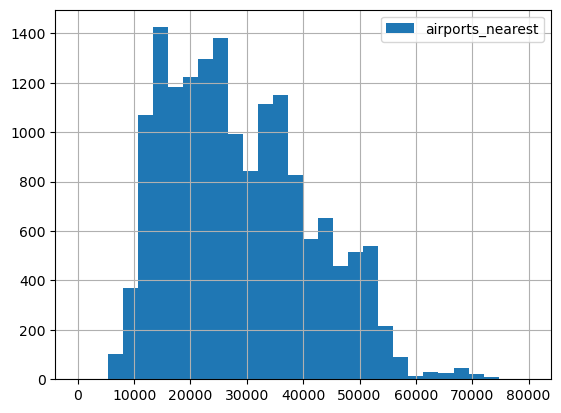

In [405]:
good_data['airports_nearest'].hist(bins=30, range=(0,80000), legend='airports_nearest')
plt.show()

Удаленность объектов недвижимости от аэропортов сильно разбросана, но все же преобладают объекты с расстоянием до аэропорта 12-14 км.

Данные по расстоянию до ближайшего парка:

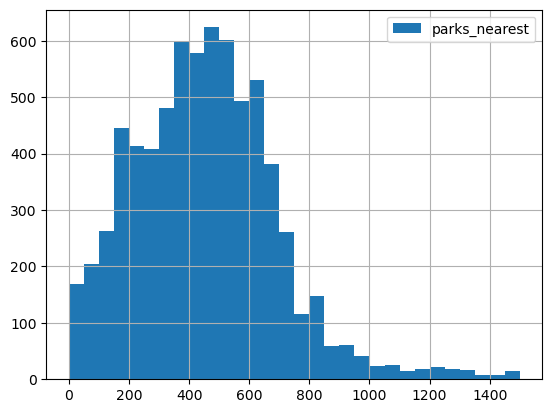

In [406]:
good_data['parks_nearest'].hist(bins=30, range=(0,1500),legend='parks_nearest')
plt.show()

Самое частое расстояние до парка среди продаваемых объектов составляет 450 м.



Данные по дню публикации объявлений:


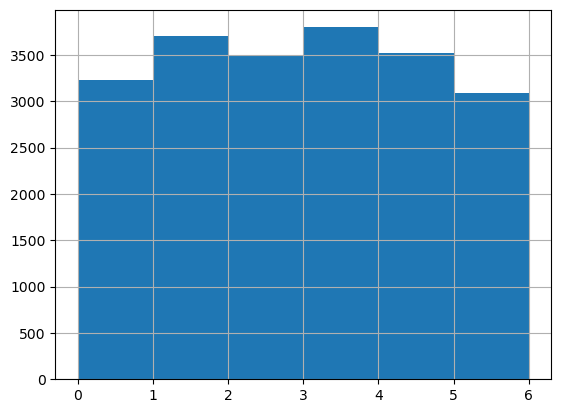

In [407]:
good_data['exposition_weekday'].hist(bins=6)
plt.show()

В целом размещение объявлений по дням недели происходило примерно равномерно с небольшим преобладанием в четверг.



Данные по месяцу публикации объявлений:

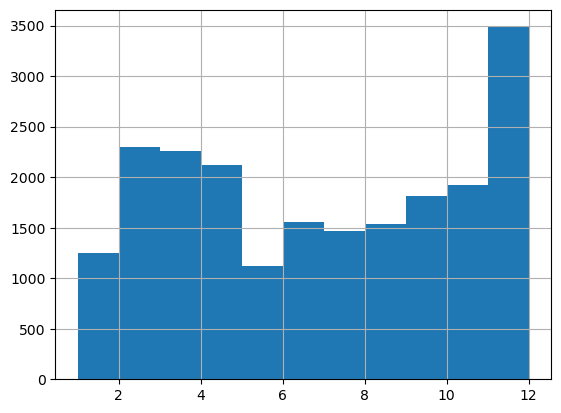

In [408]:
good_data['exposition_month'].hist(bins=11)
plt.show()

Больше всего объявления о продаже опубликованов последний месяц года.



Проанализоровав данные таблицы, сделали вывод о наиболее продаваемом объекте недвижимости: это 1-2 комнатная квартира на 2-м этаже 5-этажного дома общей площадью около 45 кв.м. с жилой площадью 15-20 кв.м. и площадью кухни около 8 кв.м., стоимостью 3,5-5 млн.руб. и высотой потолков 2,6 м., удаленная от центра на 12-16 км., от парка на 450 м и от аэропорта на 12-14 км. В конце года происходил резкий рост количества объявления о продаже.

Анализ скорости продажи квартир


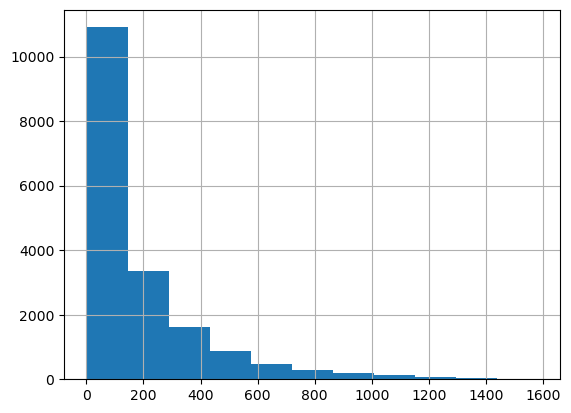

In [409]:
good_data['days_exposition'].hist(bins=11)
plt.show()

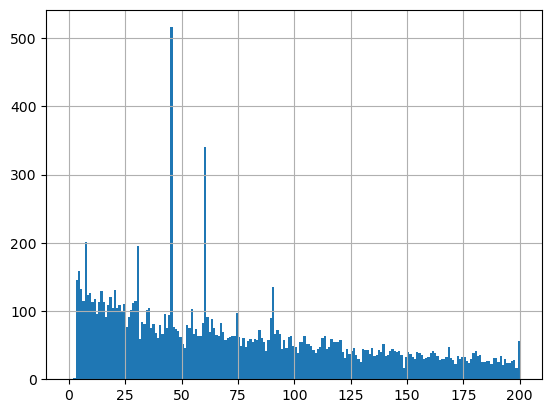

In [410]:
good_data['days_exposition'].hist(bins=200, range=(0, 200))
plt.show()

In [411]:
good_data['days_exposition'].describe()

count   17959
mean      185
std       221
min         1
25%        45
50%       102
75%       239
max      1580
Name: days_exposition, dtype: float64

Среднее время продажи квартиры составляет 180 дней. Медианное значение составляет 95 дней, что сильно отличается от среднего, такие продажи можно назвать быстрыми. При этом в наборе данных присутствуют необычно долгие продажи в течение 4-х лет и более.

Изучим факторы, влияющие на общую стоимость объекта

<Axes: xlabel='total_area', ylabel='last_price'>

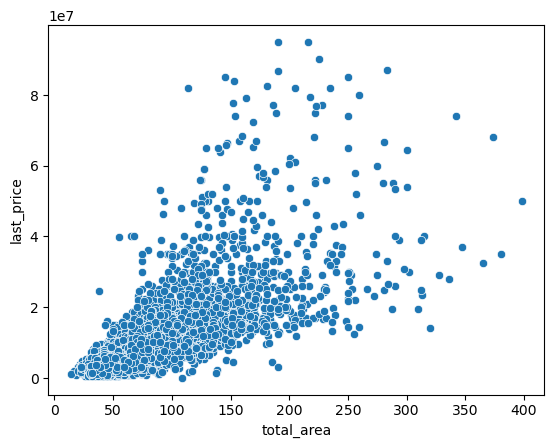

In [412]:
sns.scatterplot(x='total_area', y='last_price', data=good_data)

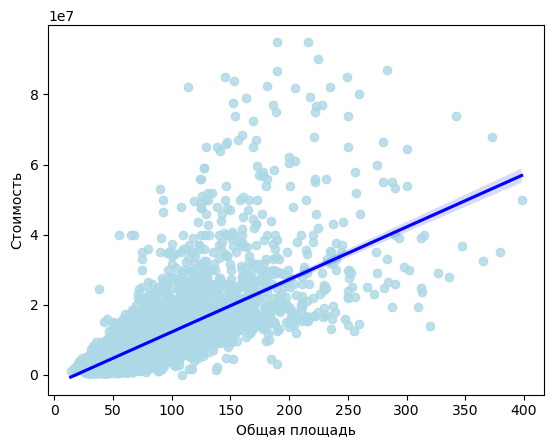

In [413]:
sns.regplot(
    x='total_area', 
    y='last_price', 
    data=good_data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Общая площадь')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что с ростом общей площади растет и цена, при этом также увеличивается разброс цен на объекты одинаковой площади.

Коэффициент Пирсона:

In [414]:
round(good_data['total_area'].corr(good_data['last_price']), 2)

0.76

Проанализируем зависимость цены от жилой площади объекта:

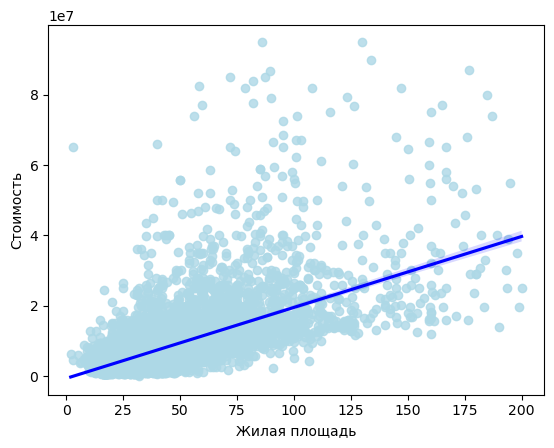

In [415]:
sns.regplot(
    x='living_area', 
    y='last_price', 
    data=good_data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Жилая площадь')
plt.ylabel(
    'Стоимость')
plt.show()

Коэффициент Пирсона:

In [416]:
round(good_data['living_area'].corr(good_data['last_price']), 2)

0.66

Из диаграммы видно, что с ростом жилой площади растет и цена, при этом также увеличивается разброс цен на объекты с одинаковой жилой площадью. Однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади.

Проанализируем зависимость цены от площади кухни объекта:

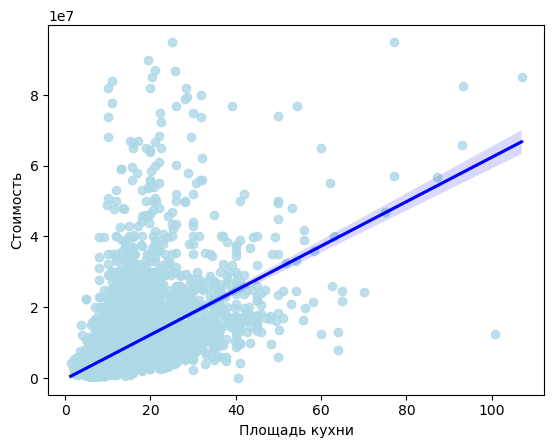

In [417]:
sns.regplot(
    x='kitchen_area', 
    y='last_price', 
    data=good_data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Площадь кухни')
plt.ylabel(
    'Стоимость')
plt.show()

In [418]:
round(good_data['kitchen_area'].corr(good_data['last_price']), 2)

0.58

Из диаграммы видно, что с ростом площади кухни растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади.

Проанализируем зависимость цены от количества комнат объекта:


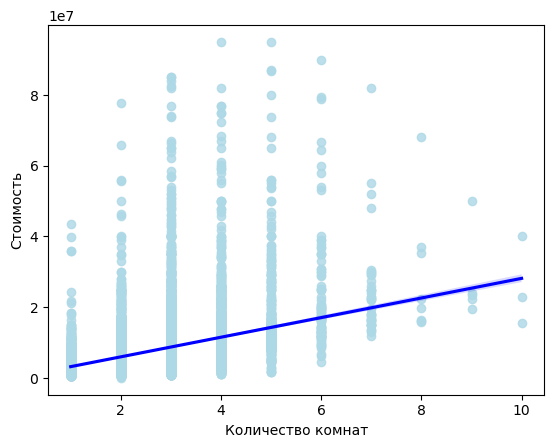

In [419]:
sns.regplot(
    x='rooms', 
    y='last_price', 
    data=good_data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Количество комнат')
plt.ylabel(
    'Стоимость')
plt.show()

In [420]:
round(good_data['rooms'].corr(good_data['last_price']), 2)


0.47

Из диаграммы видно, что с ростом количества комнат растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади. На объекты с количеством комнат равным 5 наблюдается наибольший разброс цен.



Проанализируем зависимость цены от этажа, на котором расположена квартира (первый, последний, другой):


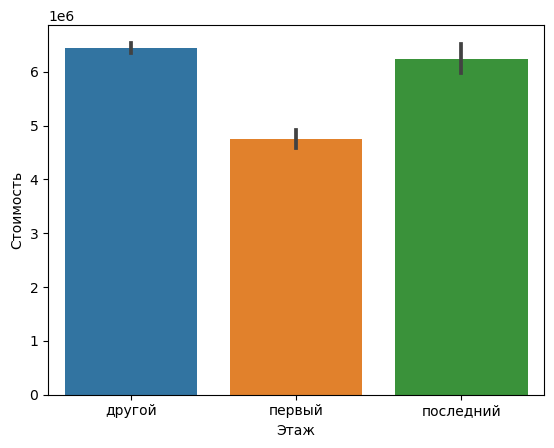

In [421]:
sns.barplot(
    x='floor_type', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'Этаж')
plt.ylabel(
    'Стоимость')
plt.show()

Из гистограммы видно, что самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся ни на первом, ни на последнем этаже.

Проанализируем зависимость цены от дня недели размещения объявления:


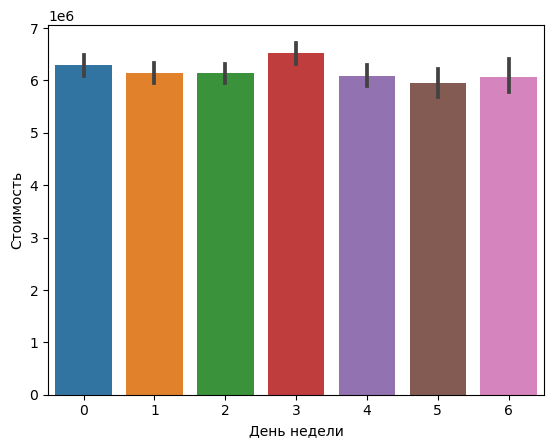

In [422]:
sns.barplot(
    x='exposition_weekday', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'День недели')
plt.ylabel(
    'Стоимость')
plt.show()

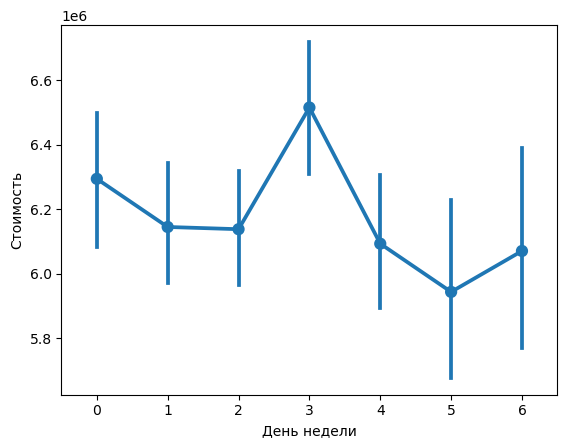

In [423]:
sns.pointplot(
    x='exposition_weekday', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'День недели')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что дороже всего продавались квартиры, размещенные в объявлениях по четвергам.



Проанализируем зависимость цены от месяца размещения объявления:


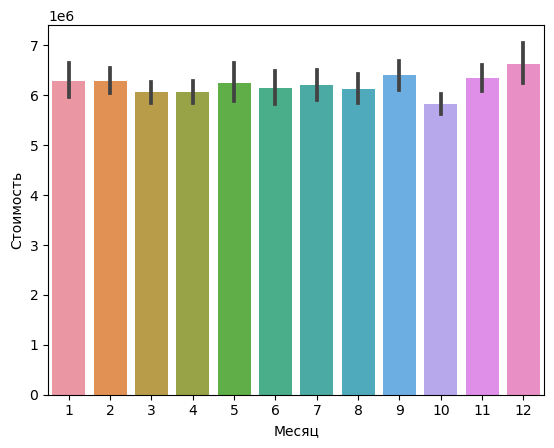

In [424]:
sns.barplot(
    x='exposition_month', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'Месяц')
plt.ylabel(
    'Стоимость')
plt.show()

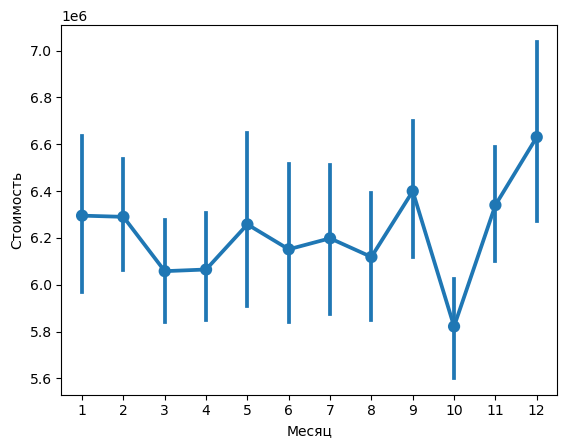

In [425]:
sns.pointplot(
    x='exposition_month', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'Месяц')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что дешевле всего продавались квартиры, размещенные в объявлениях в октябре, а дороже всего - размещенные в апреле и декабре.

Проанализируем зависимость цены от года размещения объявления:


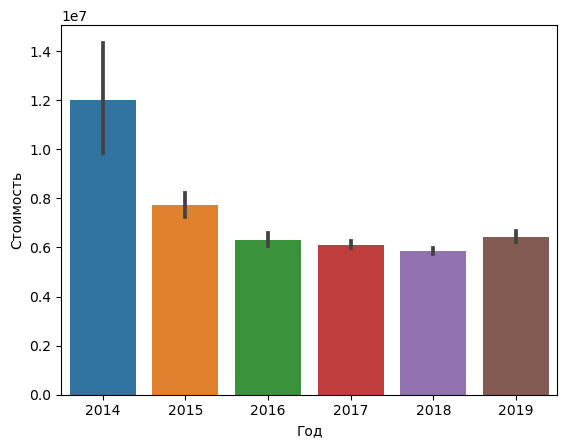

In [426]:
sns.barplot(
    x='exposition_year', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')
plt.show()

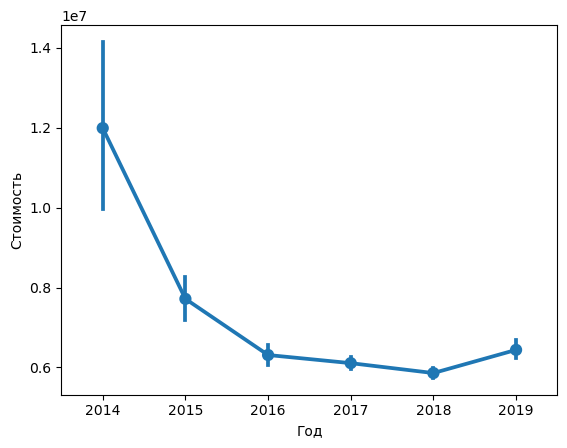

In [427]:
sns.pointplot(
    x='exposition_year', 
    y='last_price', 
    data=good_data)
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что с 2014 года цены на квартиры падали, в 2018 году была самая низкая цена продаж, после чего цены вновь начали расти. Но на уменьшение стоимости квартир могло повлиять уменьшение их площади. Проверим это предположение, проанализировав зависимость площади и цены квадратного метра от года размещения объявления:

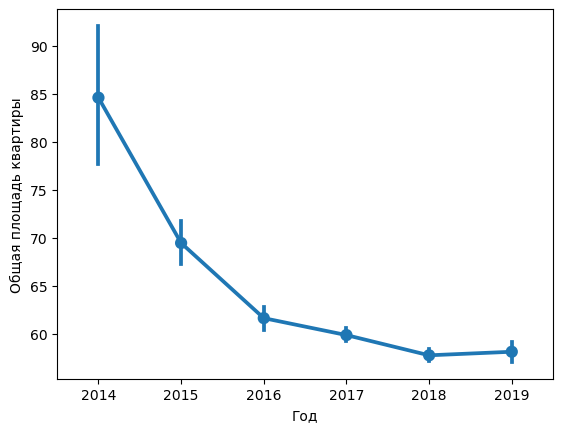

In [428]:
sns.pointplot(
    x='exposition_year', 
    y='total_area', 
    data=good_data)
plt.xlabel(
    'Год')
plt.ylabel(
    'Общая площадь квартиры')
plt.show()

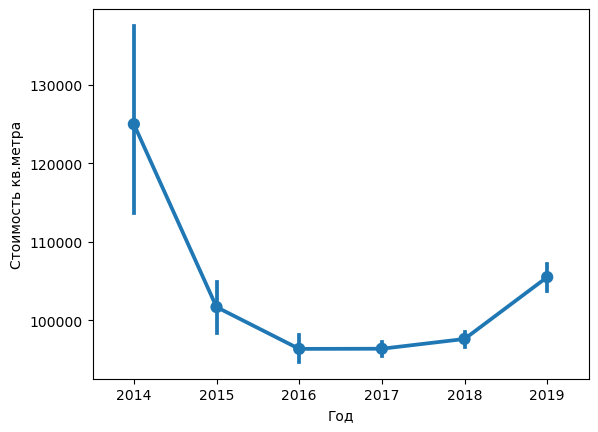

In [429]:
sns.pointplot(
    x='exposition_year', 
    y='price_per_meter', 
    data=good_data)
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость кв.метра')
plt.show()

Действительно, в 2018 г были минимальные площади продаваемых квартир, что обусловило и минимальные цены на объекты недвижимости. Проверив динамику стоимости квадратного метра, обнаружили, что в 2017- 2018 гг стоимость квадратного метра стала минимальной, после чего, вероятно, стало невыгодно продавать квартиры с большой площадью, и площадь продаваемых объектов в 2018 году упала до минимума.

Проанализируем цену одного квадратного метра


In [430]:
median_prices = good_data.groupby('locality_name')['price_per_meter']\
                        .agg(['count','median'])\
                        .sort_values(by='count', ascending=False).head(10)
median_prices

,count,median
locality_name,,
Санкт-Петербург,13970,104143
поселок Мурино,430,84922
поселок Шушары,392,77223
Всеволожск,357,65789
Пушкин,336,100000
Колпино,322,74723
Гатчина,290,67746
поселок Парголово,288,92271
деревня Кудрово,226,91715


Населенный пункт с минимальной стоимостью квадратного метра (среди 10-ти н.п. с наибольшим количеством объявлений):


In [431]:
median_prices[median_prices['median'] == median_prices['median'].min()]


,count,median
locality_name,,
Выборг,190,58357


Населенный пункт с максимальной стоимостью квадратного метра (среди 10-ти н.п. с наибольшим количеством объявлений):


In [432]:
median_prices[median_prices['median'] == median_prices['median'].max()]


,count,median
locality_name,,
Санкт-Петербург,13970,104143


Среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Выборге.



Проанализируем стоимость объектов в зависимости от расстояния до центра в километрах:


In [433]:
prices_km_to_center = good_data.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='km_to_city_center', values='price_per_meter')
prices_km_to_center

,price_per_meter
km_to_city_center,
0,235070
1,145733
2,150056
3,119608
4,127768
5,135174
6,144242
7,152740
8,124302


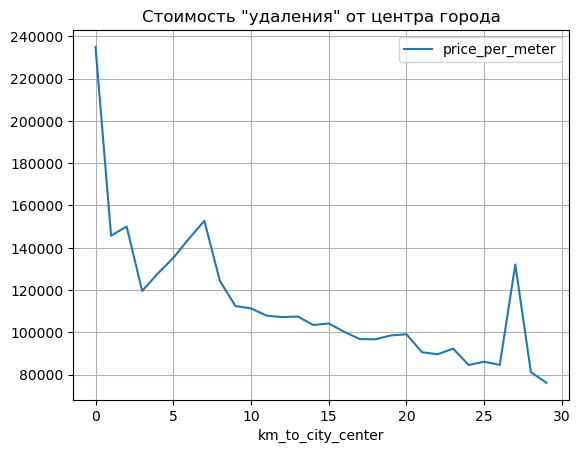

In [434]:
prices_km_to_center.plot(grid=True, title = 'Cтоимость "удаления" от центра города')
plt.show()

В целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 7 км и 27 км от центра наблюдается рост цен квадратного метра, это может быть связано с нахождением там КАД или элитных жилых районов.

### Общий вывод

Для исследования объявлений о продаже квартир мы проанализировали данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
До предобработки объем данных составлял 23699 строк, который в процессе обработки сократился до 23449 строк. В процессе обработки обнаружили наибольшее количество пропусков в столбце is_apartment.Проанализировав строки с пропусками, сделали следующие предположения: пропуски в столбце is_apartment, вероятно, связаны с тем, что данные объекты недвижимости не являются апартаментами, такие пропуски заменили на False. Пропуски в графе balcony, вероятно, связаны с тем, что в данных объектах недвижимости нет балконов, их заменили нулями. Пропуски в графе «Жилая площадь» заполнили произведениями известных величин общей площади на коэффициенты долей жилой площади в общей в зависимости от количества комнат. Пропуски в графе «Площадь кухни» заполнили минимальными значениями из двух рассчитанных площадей кухонь (рассчитанной из условия, что сумма площади кухни и жилой площади не должна превышать 0,9 от общей площади и рассчитанной как известных величин общей площади на коэффициент доли площади кухни в общей площади. Пропуски высоты потолков заполнили медианным значением. Пропуски в графах «Название н.п.» и «Общее кол-во этажей» отбросили, т.к. они составляли малую долю в общих данных. Далее изменили типы данных в столбцах first_day_exposition ,floors_total, balcony, parks_around3000, ponds_around3000, days_exposition  - для удобства последующего анализа. Далее выполнили поиск дубликатов и заменили разные написания названий одних и тех же населенных пунктов - на единые. Проанализировав редкие и выбивающиеся значения отбросили данные о квартирах стоимостью более 100 млн общей площадью более 400 кв.м. с числом комнат более 10, высотой потолков более 6 м. и менее 2 м, располагающиеся выше 25 этажа, в домах высотой более 40 этажей, с жилой площадью более 200 кв.м. И площадью кухни более 80 кв.м.
Затем посчитали и добавили в таблицу данные о стоимости одного квадратного метра, дне недели, месяце и годе публикации объявления, типе этажа квартиры и расстоянии до центра города в км.
Далее провели исследовательский анализ данных:
- Изучив параметры объектов недвижимости, сделали вывод о наиболее продаваемом объекте недвижимости: это 1-2 комнатная квартира на 2-м этаже 5-этажного дома общей площадью 40-45 кв.м. с жилой площадью 15-20 кв.м. и площадью кухни около 8 кв.м., стоимостью 3,5-5 млн.руб. и высотой потолков 2,6 м., удаленная от центра на 12-16 км., от парка на 450 м и от аэропорта на 12-14 км. В конце года происходил резкий рост количества объявления о продаже.
- Проведя анализ скорости продажи квартир, обнаружили, что среднее время продажи квартиры составляет 180 дней. Медианное значение составляет 95 дней, что сильно отличается от среднего. Чаще всего объекты продавались на 45-й и 60-й день после подачи объявлений. При этом в наборе данных присутствуют необычно долгие продажи в течение 4-х лет и более. Также обнаружили, что быстрее всего продавались квартиры, размещенные в объявлениях в ноябре, а медленнее всего - размещенные в мае.
- Изучив факторы, влияющие на стоимость объекта, выяснили что больше всего на стоимость влияет полная площадь объектов. При этом самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся ни на первом, ни на последнем этаже. Также дороже всего продавались квартиры, размещенные в объявлениях по четвергам в апреле и декабре, а дешевле всего - в октябре. Кроме того выяснили, что Из диаграммы видно, что с 2014 года цены на квартиры падали, в 2018 году была самая низкая цена продаж, после чего цены вновь начали расти. Но падение стоимости квартир было обусловлено тем, что в 2018 г. были минимальные площади продаваемых объектов. Проверив динамику стоимости квадратного метра, обнаружили, что в 2017- 2018 гг стоимость квадратного метра стала минимальной, после чего, вероятно, стало невыгодно продавать квартиры с большой площадью, и площадь продаваемых объектов в 2018 году упала до минимума.
- Проанализировав цену одного квадратного метра, выяснили, что среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - в Выборге.
- Проанализировав стоимость объектов в зависимости от расстояния до центра в километрах убедились, что в целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 7 км и 27 км от центра наблюдается рост цен квадратного метра, это может быть связано с нахождением там КАД или элитных жилых районов.

In [435]:
good_data['locality_name'].unique

<bound method Series.unique of 0                  Санкт-Петербург
1                   поселок Шушары
2                  Санкт-Петербург
3                  Санкт-Петербург
4        городской поселок Янино-1
                   ...            
20829                       Тихвин
20830                     Петергоф
20831              Санкт-Петербург
20832                        Тосно
20833          поселок Новый Учхоз
Name: locality_name, Length: 20834, dtype: object>

In [436]:
good_data['locality_name'] = good_data['locality_name'].astype("string")
string_formatter = lambda a: a[a.rfind(' ')+1:]
good_data['locality_name'] = good_data['locality_name'].apply(string_formatter) 

In [437]:
good_data['locality_name'] = good_data['locality_name'].astype("object")
good_data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Колпино', 'Гатчина', 'Федоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'Девяткино', 'Металлострой', 'Лебяжье', 'Сиверский',
       'Молодцово', 'Кузьмоловский', 'Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Заклинье', 'Торковичи', 'Первомайское',
       'Село', 'Понтонный', 'Старая', 'Лесколово', 'Путилово',
       'Ивангород', 'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское',
       'Зеленогорск', 'Бор', 'Свет', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Коммунар', 'Молодежное', 'Нурма', 'Синявино',
       'Тосно', 'Стрельна', 'Бокситогорск', 'Александровская',
       'Лопухинка', 'Терволово', 'Советский', 'Подпорожье', 'Петровское',
       'Токсово', 'Сельцо',

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [X]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод